# Experiment 2

Variable Absolute Max Bytes

This for Varied transaction rates. Batch Time out 2s.
Experiment 1.1 One Trasaction per 5 second 

In [1]:
from time import sleep
def create_peer_invoke_command():
    base = "docker exec -it cli peer chaincode invoke -o orderer.organ.com:7050 --tls true --cafile /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/ordererOrganizations/organ.com/orderers/orderer.organ.com/msp/tlscacerts/tlsca.organ.com-cert.pem -C organ-channel -n organcc "
    return(base)

def add_peers(org='hl', peer_n=0):
    hl_p1_add = ' --peerAddresses peer1.histocompatibility.organ.com:7051 '
    hl_p1_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/histocompatibility.organ.com/peers/peer1.histocompatibility.organ.com/tls/ca.crt '
    hl_p0_add = ' --peerAddresses peer0.histocompatibility.organ.com:7051 '
    hl_p0_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/histocompatibility.organ.com/peers/peer0.histocompatibility.organ.com/tls/ca.crt '
    
    ho_p1_add = ' --peerAddresses peer1.hospital.organ.com:7051 '
    ho_p1_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/hospital.organ.com/peers/peer1.hospital.organ.com/tls/ca.crt  '
    ho_p0_add = ' --peerAddresses peer0.hospital.organ.com:7051 '
    ho_p0_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/hospital.organ.com/peers/peer0.hospital.organ.com/tls/ca.crt  '
    
    gp_p1_add = ' --peerAddresses peer1.gp.organ.com:7051 '
    gp_p1_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/gp.organ.com/peers/peer1.gp.organ.com/tls/ca.crt  '
    gp_p0_add = ' --peerAddresses peer0.gp.organ.com:7051 '
    gp_p0_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/gp.organ.com/peers/peer0.gp.organ.com/tls/ca.crt  '
    
    op_p1_add = ' --peerAddresses peer1.opo.organ.com:7051 '
    op_p1_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/opo.organ.com/peers/peer1.opo.organ.com/tls/ca.crt  '
    op_p0_add = ' --peerAddresses peer0.opo.organ.com:7051 '
    op_p0_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/opo.organ.com/peers/peer0.opo.organ.com/tls/ca.crt  '
    cmd = ""
    cmd += create_peer_invoke_command() + hl_p1_add + hl_p1_cert
    cmd += hl_p0_add + hl_p0_cert
    cmd += ho_p0_add + ho_p0_cert + ho_p1_add + ho_p1_cert
    cmd += gp_p0_add + gp_p0_cert + gp_p1_add + gp_p1_cert
    cmd += op_p0_add + op_p0_cert + op_p1_add + op_p1_cert
    return(cmd)

def add_organ(organ_id = '', organ_name='', organ_data=''):
    cmd = add_peers() + '-c '
    
    cmd += '\'{"Args":["initOrgan", "' + str(organ_id) + '", "' + str(organ_name) + '", ' + str(organ_data) + ']}\''
    return(cmd)

def read_organ(organ_id='421'):
    cmd = add_peers()
    cmd +=  '-c \'{\"Args\":[\"readOrgan",\"' + str(organ_id) + '\"]}\''
    return(cmd)

def add_candidate(candidate_id = '', organ_name='', info=''):
    cmd = add_peers() + '-c '
    cmd += '\'{"Args":["initCandidate", "' + candidate_id + '", "' + organ_name + '", ' + info + ']}\''
    return(cmd)

def read_candidate(candidate_id='421'):
    cmd = add_peers()
    cmd +=  '-c \'{\"Args\":[\"readCandidate",\"' + str(candidate_id) + '\"]}\''
    return(cmd)

def docker_cleanup():
    !{ "docker rm -f $(docker ps -aq)"}
    !{ "docker volume prune -f"}
    !{ "docker network prune -f"}
    docker_images = "docker images --format '{{.Repository}}'"
    images = !{docker_images}
    dev_images=[]
    for image in images:
        if(image.find('dev-', 0, 6)>=0):
            dev_images.append(image)
    docker_rmi = "docker rmi -f "+" ".join(dev_images)
    print(docker_rmi)
    !{docker_rmi}

In [8]:
docker_cleanup()

33adfe6853a4
ac79c669e488
be790e066c94
bd2fe4e8cb7a
e17aee0f2e84
0031d506f79b
0791512b9e75
c8de0ab6cd61
65b95f456811
27e7a4b377f8
Deleted Volumes:
experiment1_peer0.hospital.organ.com
experiment1_peer1.hospital.organ.com
experiment1_peer1.histocompatibility.organ.com
e4bc0ca9cdc181fb7e7d4975b5029aceb368e3b0afdb30cbf31b22c49a7b186f
experiment1_orderer.organ.com
experiment1_peer0.histocompatibility.organ.com
experiment1_peer0.opo.organ.com
experiment1_peer1.opo.organ.com
experiment1_peer0.gp.organ.com
experiment1_peer1.gp.organ.com

Total reclaimed space: 200.6kB
Deleted Networks:
experiment1_organ_chain_network

docker rmi -f 
"docker rmi" requires at least 1 argument.
See 'docker rmi --help'.

Usage:  docker rmi [OPTIONS] IMAGE [IMAGE...]

Remove one or more images


In [3]:
with open(r"/home/thesis/Downloads/data_1.json", 'r') as file:
    data_1 = file.read()
with open(r"/home/thesis/Downloads/data_2.json", 'r') as file:
    data_2 = file.read()
with open(r"/home/thesis/Downloads/data_3.json", 'r') as file:
    data_3 = file.read()
with open(r"/home/thesis/Downloads/data_4.json", 'r') as file:
    data_4 = file.read()
import json
data = []
data.append(json.dumps(data_1))
data.append(json.dumps(data_2))
data.append(json.dumps(data_3))
data.append(json.dumps(data_4))

Issueing Transactions every 2 seconds

In [6]:
for i in range(15):
    cmd = add_candidate(str(i+8000), "Intestine", data[i%4])
    ! {cmd}
    sleep(2)
    
for i in range(15):
    cmd = add_organ(str(i+4000), "Intestine", data[i%4])
    ! {cmd}
    sleep(2)
    
for i in range(15):
    cmd = read_candidate(str(i+8000))
    ! {cmd}
    sleep(2)
    
for i in range(15):
    cmd = read_organ(str(i+4000))
    ! {cmd}
    sleep(2)

2019-04-22 07:33:15.511 UTC [main] InitCmd -> ERRO 001 Cannot run peer because cannot init crypto, folder "/opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/hoapital.organ.com/users/Admin@hospital.organ.com/msp" does not exist
2019-04-22 07:33:17.914 UTC [main] InitCmd -> ERRO 001 Cannot run peer because cannot init crypto, folder "/opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/hoapital.organ.com/users/Admin@hospital.organ.com/msp" does not exist
2019-04-22 07:33:20.307 UTC [main] InitCmd -> ERRO 001 Cannot run peer because cannot init crypto, folder "/opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/hoapital.organ.com/users/Admin@hospital.organ.com/msp" does not exist
2019-04-22 07:33:22.703 UTC [main] InitCmd -> ERRO 001 Cannot run peer because cannot init crypto, folder "/opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/hoapital.organ.com/users/Admin@hospital.organ.com/msp" doe

2019-04-22 07:34:33.445 UTC [main] InitCmd -> ERRO 001 Cannot run peer because cannot init crypto, folder "/opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/hoapital.organ.com/users/Admin@hospital.organ.com/msp" does not exist
2019-04-22 07:34:35.855 UTC [main] InitCmd -> ERRO 001 Cannot run peer because cannot init crypto, folder "/opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/hoapital.organ.com/users/Admin@hospital.organ.com/msp" does not exist
2019-04-22 07:34:38.286 UTC [main] InitCmd -> ERRO 001 Cannot run peer because cannot init crypto, folder "/opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/hoapital.organ.com/users/Admin@hospital.organ.com/msp" does not exist
2019-04-22 07:34:40.718 UTC [main] InitCmd -> ERRO 001 Cannot run peer because cannot init crypto, folder "/opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/hoapital.organ.com/users/Admin@hospital.organ.com/msp" doe

In [5]:
# !{"bash 'setup.sh'"}

2. One Transactions per 10 second

Getting the Container Logs and saving them in folder

In [6]:
# Get Docker logs
docker_container_list = []
docker_container_list = !{"docker ps --format='{{ .Names}}'"}
log_files = {}
for container in docker_container_list:
    cmd = ("docker inspect %s --format={{'.LogPath'}}"%container)
    val = !{cmd}
    log_files[container] = val[0]
    copy_cmd = ("echo ' ' | sudo -S cp %s logs_2s/%s.log" % (log_files[container], container))
    !{copy_cmd}
    chomd = ("echo ' ' | sudo -S chmod 777 logs_2s/%s.log" % ( container))
    !{chomd}
    pwd = !{"pwd"}
    log_files[container] = ('%s/logs_2s/%s.log'%(pwd[0],container))

docker_cleanup()
# print(log_files)

[sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for 

# Starting Log Analysis

In [9]:
import sys
sys.path.append("/home/thesis/ocean/organ-procurement-transplant-network/fabric/organ_chain")
from log_analysis import PeerContainer, get_time, time_to_commit, set_blocks_info
class TxnTimes:
    'This is txn times'
    def __init__(self, receive_time = 0, validate_time = 0, commmit_time = 0):
        self.receive_time = receive_time
        self.validate_time = validate_time
        self.commmit_time = commmit_time

peer_names=["peer0.gp.organ.com",
          "peer1.gp.organ.com",
           "peer0.histocompatibility.organ.com",
           "peer1.histocompatibility.organ.com",
           "peer0.opo.organ.com",
           "peer1.opo.organ.com",
           "peer0.hospital.organ.com",
           "peer1.hospital.organ.com"]
all_peers = {}

Generate a list of all the containers and set their log files

In [25]:

for container in peer_names:
    all_peers[container] = PeerContainer(str(container), log_files[container])
    set_blocks_info(all_peers[container])

In [26]:
head = "All containers with their log files are "
print(head)
for peer in peer_names:
    print("%s:%s"%(peer, type(all_peers[peer].log_file)))

All containers with their log files are 
peer0.gp.organ.com:<type 'list'>
peer1.gp.organ.com:<type 'list'>
peer0.histocompatibility.organ.com:<type 'list'>
peer1.histocompatibility.organ.com:<type 'list'>
peer0.opo.organ.com:<type 'list'>
peer1.opo.organ.com:<type 'list'>
peer0.hospital.organ.com:<type 'list'>
peer1.hospital.organ.com:<type 'list'>


Finding the times when the blocks were received

In [28]:
# Adding block received times to the PeerContainer object
for peer in peer_names:
    l = ((all_peers[peer].find_received_block()))
    print('Recevied Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Received block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        all_peers[peer].block_times[int(block_number)] = [time]
        print('%s block was received at %s by peer %s' % (block_number, time, all_peers[peer].name))

Recevied Line 65
1 block was received at 2019-04-20 23:39:47.522000+00:00 by peer peer0.gp.organ.com
2 block was received at 2019-04-20 23:39:47.645000+00:00 by peer peer0.gp.organ.com
3 block was received at 2019-04-20 23:39:47.717000+00:00 by peer peer0.gp.organ.com
4 block was received at 2019-04-20 23:39:47.792000+00:00 by peer peer0.gp.organ.com
5 block was received at 2019-04-20 23:40:09.957000+00:00 by peer peer0.gp.organ.com
6 block was received at 2019-04-20 23:43:01.128000+00:00 by peer peer0.gp.organ.com
7 block was received at 2019-04-20 23:43:06.805000+00:00 by peer peer0.gp.organ.com
8 block was received at 2019-04-20 23:43:12.395000+00:00 by peer peer0.gp.organ.com
9 block was received at 2019-04-20 23:43:17.975000+00:00 by peer peer0.gp.organ.com
10 block was received at 2019-04-20 23:43:23.566000+00:00 by peer peer0.gp.organ.com
11 block was received at 2019-04-20 23:43:29.161000+00:00 by peer peer0.gp.organ.com
12 block was received at 2019-04-20 23:43:34.788000+00:00

50 block was received at 2019-04-20 23:47:08.738000+00:00 by peer peer0.histocompatibility.organ.com
51 block was received at 2019-04-20 23:47:14.233000+00:00 by peer peer0.histocompatibility.organ.com
52 block was received at 2019-04-20 23:47:19.749000+00:00 by peer peer0.histocompatibility.organ.com
53 block was received at 2019-04-20 23:47:25.260000+00:00 by peer peer0.histocompatibility.organ.com
54 block was received at 2019-04-20 23:47:30.787000+00:00 by peer peer0.histocompatibility.organ.com
55 block was received at 2019-04-20 23:47:36.282000+00:00 by peer peer0.histocompatibility.organ.com
56 block was received at 2019-04-20 23:47:41.794000+00:00 by peer peer0.histocompatibility.organ.com
57 block was received at 2019-04-20 23:47:47.310000+00:00 by peer peer0.histocompatibility.organ.com
58 block was received at 2019-04-20 23:47:52.863000+00:00 by peer peer0.histocompatibility.organ.com
59 block was received at 2019-04-20 23:47:58.437000+00:00 by peer peer0.histocompatibility.

55 block was received at 2019-04-20 23:47:36.289000+00:00 by peer peer1.opo.organ.com
56 block was received at 2019-04-20 23:47:41.792000+00:00 by peer peer1.opo.organ.com
57 block was received at 2019-04-20 23:47:47.320000+00:00 by peer peer1.opo.organ.com
58 block was received at 2019-04-20 23:47:52.875000+00:00 by peer peer1.opo.organ.com
59 block was received at 2019-04-20 23:47:58.447000+00:00 by peer peer1.opo.organ.com
60 block was received at 2019-04-20 23:48:03.945000+00:00 by peer peer1.opo.organ.com
61 block was received at 2019-04-20 23:48:09.441000+00:00 by peer peer1.opo.organ.com
62 block was received at 2019-04-20 23:48:14.951000+00:00 by peer peer1.opo.organ.com
63 block was received at 2019-04-20 23:48:20.475000+00:00 by peer peer1.opo.organ.com
64 block was received at 2019-04-20 23:48:26.048000+00:00 by peer peer1.opo.organ.com
65 block was received at 2019-04-20 23:48:31.596000+00:00 by peer peer1.opo.organ.com
Recevied Line 65
1 block was received at 2019-04-20 23

Finding the time at which the blocks were validated

In [45]:
for peer in peer_names:
    l = ((all_peers[peer].find_validated_block()))
    print('Validated Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Validated block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Validated at %s by peer %s' % (block_number, time, all_peers[peer].name))

Validated Line 65
1 block was Validated at 2019-04-20 23:39:47.589000+00:00 by peer peer0.gp.organ.com
2 block was Validated at 2019-04-20 23:39:47.675000+00:00 by peer peer0.gp.organ.com
3 block was Validated at 2019-04-20 23:39:47.750000+00:00 by peer peer0.gp.organ.com
4 block was Validated at 2019-04-20 23:39:47.827000+00:00 by peer peer0.gp.organ.com
5 block was Validated at 2019-04-20 23:40:09.960000+00:00 by peer peer0.gp.organ.com
6 block was Validated at 2019-04-20 23:43:01.132000+00:00 by peer peer0.gp.organ.com
7 block was Validated at 2019-04-20 23:43:06.808000+00:00 by peer peer0.gp.organ.com
8 block was Validated at 2019-04-20 23:43:12.398000+00:00 by peer peer0.gp.organ.com
9 block was Validated at 2019-04-20 23:43:17.978000+00:00 by peer peer0.gp.organ.com
10 block was Validated at 2019-04-20 23:43:23.568000+00:00 by peer peer0.gp.organ.com
11 block was Validated at 2019-04-20 23:43:29.163000+00:00 by peer peer0.gp.organ.com
12 block was Validated at 2019-04-20 23:43:34

51 block was Validated at 2019-04-20 23:47:14.236000+00:00 by peer peer0.histocompatibility.organ.com
52 block was Validated at 2019-04-20 23:47:19.751000+00:00 by peer peer0.histocompatibility.organ.com
53 block was Validated at 2019-04-20 23:47:25.263000+00:00 by peer peer0.histocompatibility.organ.com
54 block was Validated at 2019-04-20 23:47:30.789000+00:00 by peer peer0.histocompatibility.organ.com
55 block was Validated at 2019-04-20 23:47:36.285000+00:00 by peer peer0.histocompatibility.organ.com
56 block was Validated at 2019-04-20 23:47:41.796000+00:00 by peer peer0.histocompatibility.organ.com
57 block was Validated at 2019-04-20 23:47:47.313000+00:00 by peer peer0.histocompatibility.organ.com
58 block was Validated at 2019-04-20 23:47:52.866000+00:00 by peer peer0.histocompatibility.organ.com
59 block was Validated at 2019-04-20 23:47:58.442000+00:00 by peer peer0.histocompatibility.organ.com
60 block was Validated at 2019-04-20 23:48:03.938000+00:00 by peer peer0.histocomp

40 block was Validated at 2019-04-20 23:46:13.636000+00:00 by peer peer1.opo.organ.com
41 block was Validated at 2019-04-20 23:46:19.166000+00:00 by peer peer1.opo.organ.com
42 block was Validated at 2019-04-20 23:46:24.666000+00:00 by peer peer1.opo.organ.com
43 block was Validated at 2019-04-20 23:46:30.179000+00:00 by peer peer1.opo.organ.com
44 block was Validated at 2019-04-20 23:46:35.707000+00:00 by peer peer1.opo.organ.com
45 block was Validated at 2019-04-20 23:46:41.230000+00:00 by peer peer1.opo.organ.com
46 block was Validated at 2019-04-20 23:46:46.721000+00:00 by peer peer1.opo.organ.com
47 block was Validated at 2019-04-20 23:46:52.231000+00:00 by peer peer1.opo.organ.com
48 block was Validated at 2019-04-20 23:46:57.734000+00:00 by peer peer1.opo.organ.com
49 block was Validated at 2019-04-20 23:47:03.249000+00:00 by peer peer1.opo.organ.com
50 block was Validated at 2019-04-20 23:47:08.753000+00:00 by peer peer1.opo.organ.com
51 block was Validated at 2019-04-20 23:47:

Finding the time at which the blocks were Commited to the ledger

In [46]:
for peer in peer_names:
    l = ((all_peers[peer].find_commited_block()))
    print('Committed Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Committed block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Committed at %s by peer %s' % (block_number, time, all_peers[peer].name))

Committed Line 66
0 block was Committed at 2019-04-20 23:39:41.450000+00:00 by peer peer0.gp.organ.com
1 block was Committed at 2019-04-20 23:39:47.645000+00:00 by peer peer0.gp.organ.com
2 block was Committed at 2019-04-20 23:39:47.716000+00:00 by peer peer0.gp.organ.com
3 block was Committed at 2019-04-20 23:39:47.791000+00:00 by peer peer0.gp.organ.com
4 block was Committed at 2019-04-20 23:39:47.882000+00:00 by peer peer0.gp.organ.com
5 block was Committed at 2019-04-20 23:40:10.071000+00:00 by peer peer0.gp.organ.com
6 block was Committed at 2019-04-20 23:43:01.280000+00:00 by peer peer0.gp.organ.com
7 block was Committed at 2019-04-20 23:43:06.911000+00:00 by peer peer0.gp.organ.com
8 block was Committed at 2019-04-20 23:43:12.554000+00:00 by peer peer0.gp.organ.com
9 block was Committed at 2019-04-20 23:43:18.090000+00:00 by peer peer0.gp.organ.com
10 block was Committed at 2019-04-20 23:43:23.699000+00:00 by peer peer0.gp.organ.com
11 block was Committed at 2019-04-20 23:43:29.

50 block was Committed at 2019-04-20 23:47:08.862000+00:00 by peer peer0.histocompatibility.organ.com
51 block was Committed at 2019-04-20 23:47:14.379000+00:00 by peer peer0.histocompatibility.organ.com
52 block was Committed at 2019-04-20 23:47:19.833000+00:00 by peer peer0.histocompatibility.organ.com
53 block was Committed at 2019-04-20 23:47:25.353000+00:00 by peer peer0.histocompatibility.organ.com
54 block was Committed at 2019-04-20 23:47:30.861000+00:00 by peer peer0.histocompatibility.organ.com
55 block was Committed at 2019-04-20 23:47:36.387000+00:00 by peer peer0.histocompatibility.organ.com
56 block was Committed at 2019-04-20 23:47:41.902000+00:00 by peer peer0.histocompatibility.organ.com
57 block was Committed at 2019-04-20 23:47:47.410000+00:00 by peer peer0.histocompatibility.organ.com
58 block was Committed at 2019-04-20 23:47:52.970000+00:00 by peer peer0.histocompatibility.organ.com
59 block was Committed at 2019-04-20 23:47:58.550000+00:00 by peer peer0.histocomp

44 block was Committed at 2019-04-20 23:46:35.803000+00:00 by peer peer1.opo.organ.com
45 block was Committed at 2019-04-20 23:46:41.351000+00:00 by peer peer1.opo.organ.com
46 block was Committed at 2019-04-20 23:46:46.845000+00:00 by peer peer1.opo.organ.com
47 block was Committed at 2019-04-20 23:46:52.363000+00:00 by peer peer1.opo.organ.com
48 block was Committed at 2019-04-20 23:46:57.853000+00:00 by peer peer1.opo.organ.com
49 block was Committed at 2019-04-20 23:47:03.380000+00:00 by peer peer1.opo.organ.com
50 block was Committed at 2019-04-20 23:47:08.884000+00:00 by peer peer1.opo.organ.com
51 block was Committed at 2019-04-20 23:47:14.388000+00:00 by peer peer1.opo.organ.com
52 block was Committed at 2019-04-20 23:47:19.841000+00:00 by peer peer1.opo.organ.com
53 block was Committed at 2019-04-20 23:47:25.371000+00:00 by peer peer1.opo.organ.com
54 block was Committed at 2019-04-20 23:47:30.905000+00:00 by peer peer1.opo.organ.com
55 block was Committed at 2019-04-20 23:47:

In [10]:
class Block:
    def __init__(self, block_number):
        self.__name__ = str(block_number)
        self.block_number = block_number
        self.peers_times = {}
        
    def add_peer(self, peer_name, block_receive_time, block_validated_time, block_commited_time):
        '''
            This involves getting the block receive time, block validated time and the block commit time.
        '''

        t = TxnTimes(block_receive_time, block_validated_time, block_commited_time)
        
        self.peers_times[peer_name] = t
        
        print('Adding %s with rt %s, vt %s and ct %s' %(peer_name, block_receive_time, block_validated_time, block_commited_time))
        
    def get_longest_commit_time():
        largest = self.peer.itervalues().next()[2]
        for peer_id, time_array in self.peer:
            if(time_array[2]):
                pass
    def print_block_info():
        print("Block Number %s" % self.block_number)
        print("Peer Informa")
    
    def get_smallest_commit_time():
        pass
    
    def get_propogation_time(self, peers=all_peers):
        commit_times = []
        receive_times = []
        for peer in self.peers_times:
            commit_times.append(self.peers_times[peer].commmit_time)
            receive_times.append(self.peers_times[peer].receive_time)
        max_commit_time = max(commit_times)
        min_receive_time = min(receive_times)
        return(max_commit_time - min_receive_time)
        


In [47]:
print(all_peers["peer0.histocompatibility.organ.com"].block_times[1])

[datetime.datetime(2019, 4, 20, 23, 39, 46, 745000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 762000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 819000, tzinfo=tzutc())]


In [48]:
blocks = {}
# print(all_peers)
for j, peer in enumerate(all_peers):
    print(peer)
    print(all_peers[peer].block_times)
    print(len(all_peers[peer].block_times))
    for i in range(1, len(all_peers[peer].block_times)):
        rt = all_peers[peer].block_times[i][0]
        vt = all_peers[peer].block_times[i][1]
        ct = all_peers[peer].block_times[i][2]
        print("rt %s; vt %s; ct %s"% (rt, vt, ct))
        if i not in blocks:
            blocks[i] = Block(i)
        blocks[i].add_peer(all_peers[peer].name, rt, vt, ct)
    print(all_peers[peer].name)

peer0.histocompatibility.organ.com
{1: [datetime.datetime(2019, 4, 20, 23, 39, 46, 745000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 762000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 819000, tzinfo=tzutc())], 2: [datetime.datetime(2019, 4, 20, 23, 39, 46, 819000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 832000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 886000, tzinfo=tzutc())], 3: [datetime.datetime(2019, 4, 20, 23, 39, 46, 886000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 907000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 948000, tzinfo=tzutc())], 4: [datetime.datetime(2019, 4, 20, 23, 39, 46, 949000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 973000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 47, 48000, tzinfo=tzutc())], 5: [datetime.datetime(2019, 4, 20, 23, 40, 9, 957000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 40, 9, 960000, tzinfo=t

In [49]:
propogation_times = []
for i in range(1, len(blocks)):
    print('Propogation Time of %s is %s' % (i, blocks[i].get_propogation_time(all_peers[peer])))
    propogation_times.append(blocks[i].get_propogation_time(all_peers[peer]))

Propogation Time of 1 is 0:00:21.593000
Propogation Time of 2 is 0:00:21.574000
Propogation Time of 3 is 0:00:21.551000
Propogation Time of 4 is 0:00:21.521000
Propogation Time of 5 is 0:00:00.156000
Propogation Time of 6 is 0:00:00.167000
Propogation Time of 7 is 0:00:00.154000
Propogation Time of 8 is 0:00:00.159000
Propogation Time of 9 is 0:00:00.177000
Propogation Time of 10 is 0:00:00.175000
Propogation Time of 11 is 0:00:00.222000
Propogation Time of 12 is 0:00:00.237000
Propogation Time of 13 is 0:00:00.257000
Propogation Time of 14 is 0:00:00.273000
Propogation Time of 15 is 0:00:00.304000
Propogation Time of 16 is 0:00:00.286000
Propogation Time of 17 is 0:00:00.304000
Propogation Time of 18 is 0:00:00.294000
Propogation Time of 19 is 0:00:00.330000
Propogation Time of 20 is 0:00:00.360000
Propogation Time of 21 is 0:00:00.359000
Propogation Time of 22 is 0:00:00.384000
Propogation Time of 23 is 0:00:00.410000
Propogation Time of 24 is 0:00:00.418000
Propogation Time of 25 is

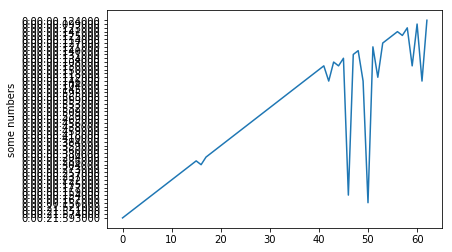

[datetime.timedelta(0, 21, 593000), datetime.timedelta(0, 21, 574000), datetime.timedelta(0, 21, 551000), datetime.timedelta(0, 21, 521000), datetime.timedelta(0, 0, 156000), datetime.timedelta(0, 0, 167000), datetime.timedelta(0, 0, 154000), datetime.timedelta(0, 0, 159000), datetime.timedelta(0, 0, 177000), datetime.timedelta(0, 0, 175000), datetime.timedelta(0, 0, 222000), datetime.timedelta(0, 0, 237000), datetime.timedelta(0, 0, 257000), datetime.timedelta(0, 0, 273000), datetime.timedelta(0, 0, 304000), datetime.timedelta(0, 0, 286000), datetime.timedelta(0, 0, 304000), datetime.timedelta(0, 0, 294000), datetime.timedelta(0, 0, 330000), datetime.timedelta(0, 0, 360000), datetime.timedelta(0, 0, 359000), datetime.timedelta(0, 0, 384000), datetime.timedelta(0, 0, 410000), datetime.timedelta(0, 0, 418000), datetime.timedelta(0, 0, 459000), datetime.timedelta(0, 0, 438000), datetime.timedelta(0, 0, 456000), datetime.timedelta(0, 0, 469000), datetime.timedelta(0, 0, 539000), datetime.

In [51]:
import matplotlib.pyplot as plt
str_p_time=[]
for time in propogation_times:
    str_p_time.append(str(time))
plt.plot(str_p_time)
plt.ylabel('some numbers')
plt.show()
print(propogation_times)

1.2. One Transactions per 10 second

In [6]:
for i in range(7):
    cmd = add_candidate(str(i+8000), "Intestine", data[i%4])
    ! {cmd}
    sleep(10)
    
for i in range(8):
    cmd = add_organ(str(i+4000), "Intestine", data[i%4])
    ! {cmd}
    sleep(10)
    
for i in range(7):
    cmd = read_candidate(str(i+8000))
    ! {cmd}
    sleep(10)
    
for i in range(8):
    cmd = read_organ(str(i+4000))
    ! {cmd}
    sleep(10)

2019-04-21 20:34:39.120 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:34:49.813 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:35:00.595 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:35:11.242 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:35:21.895 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:35:32.534 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful

2019-04-21 20:37:30.249 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8001\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 20:37:40.777 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8002\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 20:37:51.349 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8003\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-04-21 20:38:01.969 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8004\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-04-21 20:38:12.548 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8005\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 20:38:23.084 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8006\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 20:38:33.635 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4000\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:38:44.147 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4001\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:38:54.670 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4002\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-21 20:39:05.175 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4003\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-04-21 20:39:15.688 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4004\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:39:26.234 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4005\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:39:36.744 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4006\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-21 20:39:47.284 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4007\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

In [7]:
# Get Docker logs
# Get Docker logs
docker_container_list = []
docker_container_list = !{"docker ps --format='{{ .Names}}'"}
log_files = {}
for container in docker_container_list:
    cmd = ("docker inspect %s --format={{'.LogPath'}}"%container)
    val = !{cmd}
    log_files[container] = val[0]
    copy_cmd = ("echo ' ' | sudo -S cp %s logs_5s/%s.log" % (log_files[container], container))
    !{copy_cmd}
    chomd = ("echo ' ' | sudo -S chmod 777 logs_5s/%s.log" % ( container))
    !{chomd}
    pwd = !{"pwd"}
    log_files[container] = ('%s/logs_5s/%s.log'%(pwd[0],container))


[sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for 

In [8]:
docker_cleanup()

0dbabb72db2e
eace4068f862
c10d5c34f5d6
ab3bb5c6aeaf
111cfee211e3
4b6c418539e9
919cba17da5d
305ce06a8afd
a8630a5cdfba
8203a409b2ee
7819d7acf94f
96bbbe71e3f9
13b13884b2f3
e911ebb2bdae
a6222cfd2b5b
d7726f7d8952
95650d80d835
116aedbdced9
Deleted Volumes:
experiment1_peer1.hospital.organ.com
experiment1_peer1.histocompatibility.organ.com
experiment1_peer0.opo.organ.com
experiment1_peer1.opo.organ.com
experiment1_peer0.gp.organ.com
524d0a000589da4efce67be210be9b8cd13166369af977d974a8c210b1e92e24
experiment1_orderer.organ.com
experiment1_peer0.hospital.organ.com
experiment1_peer0.histocompatibility.organ.com
experiment1_peer1.gp.organ.com

Total reclaimed space: 16.34MB
Deleted Networks:
experiment1_organ_chain_network

docker rmi -f dev-peer1.opo.organ.com-organcc-1.0-f7ab76561c21a418dff95bfcdf78a45d8518b5f2d2be784ba3c86fb909c544e7 dev-peer0.opo.organ.com-organcc-1.0-3c2835bd5a5e83879fa36d0ce15cceb12743fd1bbdab349bc7725cdd819233c1 dev-peer0.gp.organ.com-organcc-1.0-98700bef371b6133ea4b2c0083

In [11]:
for container in peer_names:
    all_peers[container] = PeerContainer(str(container), log_files[container])
    set_blocks_info(all_peers[container])


In [12]:
head = "All containers with their log files are "
print(head)
for peer in peer_names:
    print("%s:%s"%(peer, type(all_peers[peer].log_file)))
    
# Adding block received times to the PeerContainer object
for peer in peer_names:
    l = ((all_peers[peer].find_received_block()))
    print('Recevied Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Received block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        all_peers[peer].block_times[int(block_number)] = [time]
        print('%s block was received at %s by peer %s' % (block_number, time, all_peers[peer].name))
        
for peer in peer_names:
    l = ((all_peers[peer].find_validated_block()))
    print('Validated Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Validated block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Validated at %s by peer %s' % (block_number, time, all_peers[peer].name))    
    
for peer in peer_names:
    l = ((all_peers[peer].find_commited_block()))
    print('Committed Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Committed block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Committed at %s by peer %s' % (block_number, time, all_peers[peer].name))
        
blocks = {}
# print(all_peers)
for j, peer in enumerate(all_peers):
    print(peer)
    print(all_peers[peer].block_times)
    print(len(all_peers[peer].block_times))
    for i in range(1, len(all_peers[peer].block_times)):
        rt = all_peers[peer].block_times[i][0]
        vt = all_peers[peer].block_times[i][1]
        ct = all_peers[peer].block_times[i][2]
        print("rt %s; vt %s; ct %s"% (rt, vt, ct))
        if i not in blocks:
            blocks[i] = Block(i)
        blocks[i].add_peer(all_peers[peer].name, rt, vt, ct)
    print(all_peers[peer].name)
    
propogation_times = []
for i in range(1, len(blocks)):
    print('Propogation Time of %s is %s' % (i, blocks[i].get_propogation_time(all_peers[peer])))
    propogation_times.append(blocks[i].get_propogation_time(all_peers[peer]))

All containers with their log files are 
peer0.gp.organ.com:<type 'list'>
peer1.gp.organ.com:<type 'list'>
peer0.histocompatibility.organ.com:<type 'list'>
peer1.histocompatibility.organ.com:<type 'list'>
peer0.opo.organ.com:<type 'list'>
peer1.opo.organ.com:<type 'list'>
peer0.hospital.organ.com:<type 'list'>
peer1.hospital.organ.com:<type 'list'>
Recevied Line 35
1 block was received at 2019-04-21 20:31:50.274000+00:00 by peer peer0.gp.organ.com
2 block was received at 2019-04-21 20:31:50.419000+00:00 by peer peer0.gp.organ.com
3 block was received at 2019-04-21 20:31:50.518000+00:00 by peer peer0.gp.organ.com
4 block was received at 2019-04-21 20:31:50.594000+00:00 by peer peer0.gp.organ.com
5 block was received at 2019-04-21 20:32:10.754000+00:00 by peer peer0.gp.organ.com
6 block was received at 2019-04-21 20:34:41.128000+00:00 by peer peer0.gp.organ.com
7 block was received at 2019-04-21 20:34:51.822000+00:00 by peer peer0.gp.organ.com
8 block was received at 2019-04-21 20:35:02.

21 block was received at 2019-04-21 20:37:21.683000+00:00 by peer peer1.hospital.organ.com
22 block was received at 2019-04-21 20:37:32.264000+00:00 by peer peer1.hospital.organ.com
23 block was received at 2019-04-21 20:37:42.792000+00:00 by peer peer1.hospital.organ.com
24 block was received at 2019-04-21 20:37:53.367000+00:00 by peer peer1.hospital.organ.com
25 block was received at 2019-04-21 20:38:03.990000+00:00 by peer peer1.hospital.organ.com
26 block was received at 2019-04-21 20:38:14.574000+00:00 by peer peer1.hospital.organ.com
27 block was received at 2019-04-21 20:38:25.100000+00:00 by peer peer1.hospital.organ.com
28 block was received at 2019-04-21 20:38:35.652000+00:00 by peer peer1.hospital.organ.com
29 block was received at 2019-04-21 20:38:46.165000+00:00 by peer peer1.hospital.organ.com
30 block was received at 2019-04-21 20:38:56.686000+00:00 by peer peer1.hospital.organ.com
31 block was received at 2019-04-21 20:39:07.188000+00:00 by peer peer1.hospital.organ.com

28 block was Validated at 2019-04-21 20:38:35.656000+00:00 by peer peer1.opo.organ.com
29 block was Validated at 2019-04-21 20:38:46.171000+00:00 by peer peer1.opo.organ.com
30 block was Validated at 2019-04-21 20:38:56.692000+00:00 by peer peer1.opo.organ.com
31 block was Validated at 2019-04-21 20:39:07.195000+00:00 by peer peer1.opo.organ.com
32 block was Validated at 2019-04-21 20:39:17.708000+00:00 by peer peer1.opo.organ.com
33 block was Validated at 2019-04-21 20:39:28.260000+00:00 by peer peer1.opo.organ.com
34 block was Validated at 2019-04-21 20:39:38.773000+00:00 by peer peer1.opo.organ.com
35 block was Validated at 2019-04-21 20:39:49.306000+00:00 by peer peer1.opo.organ.com
Validated Line 35
1 block was Validated at 2019-04-21 20:31:49.135000+00:00 by peer peer0.hospital.organ.com
2 block was Validated at 2019-04-21 20:31:49.212000+00:00 by peer peer0.hospital.organ.com
3 block was Validated at 2019-04-21 20:31:49.338000+00:00 by peer peer0.hospital.organ.com
4 block was V

18 block was Committed at 2019-04-21 20:36:49.937000+00:00 by peer peer1.histocompatibility.organ.com
19 block was Committed at 2019-04-21 20:37:00.796000+00:00 by peer peer1.histocompatibility.organ.com
20 block was Committed at 2019-04-21 20:37:11.491000+00:00 by peer peer1.histocompatibility.organ.com
21 block was Committed at 2019-04-21 20:37:21.802000+00:00 by peer peer1.histocompatibility.organ.com
22 block was Committed at 2019-04-21 20:37:32.406000+00:00 by peer peer1.histocompatibility.organ.com
23 block was Committed at 2019-04-21 20:37:42.902000+00:00 by peer peer1.histocompatibility.organ.com
24 block was Committed at 2019-04-21 20:37:53.489000+00:00 by peer peer1.histocompatibility.organ.com
25 block was Committed at 2019-04-21 20:38:04.098000+00:00 by peer peer1.histocompatibility.organ.com
26 block was Committed at 2019-04-21 20:38:14.710000+00:00 by peer peer1.histocompatibility.organ.com
27 block was Committed at 2019-04-21 20:38:25.214000+00:00 by peer peer1.histocomp

Adding peer0.hospital.organ.com with rt 2019-04-21 20:31:49.106000+00:00, vt 2019-04-21 20:31:49.135000+00:00 and ct 2019-04-21 20:31:49.184000+00:00
rt 2019-04-21 20:31:49.184000+00:00; vt 2019-04-21 20:31:49.212000+00:00; ct 2019-04-21 20:31:49.287000+00:00
Adding peer0.hospital.organ.com with rt 2019-04-21 20:31:49.184000+00:00, vt 2019-04-21 20:31:49.212000+00:00 and ct 2019-04-21 20:31:49.287000+00:00
rt 2019-04-21 20:31:49.287000+00:00; vt 2019-04-21 20:31:49.338000+00:00; ct 2019-04-21 20:31:49.404000+00:00
Adding peer0.hospital.organ.com with rt 2019-04-21 20:31:49.287000+00:00, vt 2019-04-21 20:31:49.338000+00:00 and ct 2019-04-21 20:31:49.404000+00:00
rt 2019-04-21 20:31:49.405000+00:00; vt 2019-04-21 20:31:49.451000+00:00; ct 2019-04-21 20:31:49.515000+00:00
Adding peer0.hospital.organ.com with rt 2019-04-21 20:31:49.405000+00:00, vt 2019-04-21 20:31:49.451000+00:00 and ct 2019-04-21 20:31:49.515000+00:00
rt 2019-04-21 20:32:10.756000+00:00; vt 2019-04-21 20:32:10.758000+00:

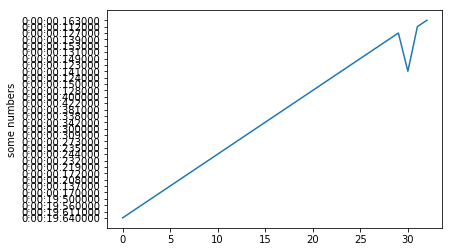

[datetime.timedelta(0, 19, 640000), datetime.timedelta(0, 19, 611000), datetime.timedelta(0, 19, 560000), datetime.timedelta(0, 19, 500000), datetime.timedelta(0, 0, 170000), datetime.timedelta(0, 0, 137000), datetime.timedelta(0, 0, 208000), datetime.timedelta(0, 0, 172000), datetime.timedelta(0, 0, 219000), datetime.timedelta(0, 0, 232000), datetime.timedelta(0, 0, 244000), datetime.timedelta(0, 0, 235000), datetime.timedelta(0, 0, 273000), datetime.timedelta(0, 0, 309000), datetime.timedelta(0, 0, 300000), datetime.timedelta(0, 0, 342000), datetime.timedelta(0, 0, 338000), datetime.timedelta(0, 0, 381000), datetime.timedelta(0, 0, 422000), datetime.timedelta(0, 0, 400000), datetime.timedelta(0, 0, 128000), datetime.timedelta(0, 0, 150000), datetime.timedelta(0, 0, 124000), datetime.timedelta(0, 0, 141000), datetime.timedelta(0, 0, 123000), datetime.timedelta(0, 0, 149000), datetime.timedelta(0, 0, 131000), datetime.timedelta(0, 0, 153000), datetime.timedelta(0, 0, 139000), datetime.

In [14]:
import matplotlib.pyplot as plt
str_p_time=[]
for time in propogation_times:
    str_p_time.append(str(time))
plt.plot(str_p_time)
plt.ylabel('some numbers')
plt.show()
# print(propogation_times)

# Experiment 1.2
With batch time-out of 5s

In [15]:
docker_cleanup()

"docker rm" requires at least 1 argument.
See 'docker rm --help'.

Usage:  docker rm [OPTIONS] CONTAINER [CONTAINER...]

Remove one or more containers
Total reclaimed space: 0B
docker rmi -f 
"docker rmi" requires at least 1 argument.
See 'docker rmi --help'.

Usage:  docker rmi [OPTIONS] IMAGE [IMAGE...]

Remove one or more images


2019-04-21 20:52:32.862 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:52:38.513 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:52:44.097 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:52:49.683 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:52:55.259 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:53:00.900 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful

2019-04-21 20:55:30.927 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8001\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 20:55:36.448 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8002\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 20:55:41.973 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8003\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-04-21 20:55:47.486 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8004\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-04-21 20:55:53.283 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8005\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

785582, \\\"consent_don_regis\\\": 84298638, \\\"vdrl_don\\\": \\\"xh\\\", \\\"lis2_initial_flush_ostxt\\\": \\\"trymbgcicoyoqwxjvybxspzmzysqlngvdunrkftsysejgnbfxm\\\", \\\"rt_ki_glomerul_count\\\": 91993510, \\\"diast_pa_cath_init_don\\\": 41088811, \\\"ins2_final_flush\\\": 80650651, \\\"num_lu_tx\\\": 24696236, \\\"hr_disposition\\\": 66475708, \\\"kir_discard_cd\\\": 19602921, \\\"other_inf_conf_don\\\": \\\"c\\\", \\\"don_date\\\": 77690265, \\\"pas2_back_tbl_flush\\\": 53281105, \\\"lv_eject_don\\\": 97959703, \\\"lipase_don (pa donors only)\\\": 76221364, \\\"pas2_final_flush\\\": 67742801, \\\"lis1_discard_cd\\\": 64972429, \\\"insulin_dep_don\\\": 96140564, \\\"lub_initial_flush_ostxt\\\": \\\"pxzkrpgryeyqnfsqyydfvqrngfaiapgbpdahryzbopytfufxfr\\\", \\\"lis2_disposition\\\": 60317853, \\\"kib_disposition\\\": 67615889, \\\"death_circum_don\\\": 45241583, \\\"hr_reason_cd\\\": 26728121, \\\"hr_discard_cd\\\": 1562302, \\\"kib_initial_flush_ostxt\\\": \\\"lhyejbjeurndgiwmxbjohcmz

2019-04-21 20:56:04.449 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8007\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-04-21 20:56:10.065 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8008\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-04-21 20:56:15.606 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8009\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 20:56:21.168 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8010\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 20:56:26.694 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8011\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-04-21 20:56:32.212 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8012\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-04-21 20:56:37.744 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8013\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 20:56:43.265 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8014\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 20:56:48.779 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4000\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:56:54.266 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4001\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:56:59.892 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4002\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-21 20:57:05.533 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4003\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-04-21 20:57:11.138 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4004\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:57:16.730 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4005\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:57:22.335 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4006\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-21 20:57:27.902 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4007\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-04-21 20:57:33.502 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4008\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:57:39.043 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4009\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:57:44.586 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4010\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-21 20:57:50.123 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4011\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

_initial_flush\\\": 74910400, \\\"da2\\\": 32136169, \\\"ins2_discard_cd_ostxt\\\": \\\"zcudncnzifqkfnpbvmyqoizelgitcqhbwezycscceauioyhzta\\\", \\\"consent_px_writ_doc\\\": \\\"o\\\", \\\"in_back_tbl_flush_ostxt\\\": \\\"navfposrknosqsxqgkdjotwosqshxqnbptuqyktqbrtbpcnspi\\\", \\\"contin_cocaine_don\\\": \\\"g\\\", \\\"age_don\\\": 17052542, \\\"bun_don\\\": 16124096, \\\"pas1_reason_cd\\\": 36117764, \\\"recovery_date_don\\\": 28797134, \\\"consent_don_regis\\\": 16880181, \\\"vdrl_don\\\": \\\"as\\\", \\\"lis2_initial_flush_ostxt\\\": \\\"funajcwqvefikasbrmrsrowqhbambvtemwzkxhxcfhyeyuuhod\\\", \\\"rt_ki_glomerul_count\\\": 33679775, \\\"diast_pa_cath_init_don\\\": 64139705, \\\"ins2_final_flush\\\": 64935333, \\\"num_lu_tx\\\": 14252110, \\\"hr_disposition\\\": 97912110, \\\"kir_discard_cd\\\": 33403354, \\\"other_inf_conf_don\\\": \\\"j\\\", \\\"don_date\\\": 19008927, \\\"pas2_back_tbl_flush\\\": 25424535, \\\"lv_eject_don\\\": 58987171, \\\"lipase_don (pa donors only)\\\": 76881662

2019-04-21 20:58:01.179 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4013\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:58:06.670 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4014\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

[sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for 

18 block was received at 2019-04-21 20:53:45.347000+00:00 by peer peer1.histocompatibility.organ.com
19 block was received at 2019-04-21 20:53:51.045000+00:00 by peer peer1.histocompatibility.organ.com
20 block was received at 2019-04-21 20:53:56.712000+00:00 by peer peer1.histocompatibility.organ.com
21 block was received at 2019-04-21 20:54:02.507000+00:00 by peer peer1.histocompatibility.organ.com
22 block was received at 2019-04-21 20:54:08.283000+00:00 by peer peer1.histocompatibility.organ.com
23 block was received at 2019-04-21 20:54:14.059000+00:00 by peer peer1.histocompatibility.organ.com
24 block was received at 2019-04-21 20:54:19.848000+00:00 by peer peer1.histocompatibility.organ.com
25 block was received at 2019-04-21 20:54:25.671000+00:00 by peer peer1.histocompatibility.organ.com
26 block was received at 2019-04-21 20:54:31.521000+00:00 by peer peer1.histocompatibility.organ.com
27 block was received at 2019-04-21 20:54:37.351000+00:00 by peer peer1.histocompatibility.

27 block was received at 2019-04-21 20:54:37.339000+00:00 by peer peer0.hospital.organ.com
28 block was received at 2019-04-21 20:54:43.180000+00:00 by peer peer0.hospital.organ.com
29 block was received at 2019-04-21 20:54:49.038000+00:00 by peer peer0.hospital.organ.com
30 block was received at 2019-04-21 20:54:54.923000+00:00 by peer peer0.hospital.organ.com
31 block was received at 2019-04-21 20:55:00.768000+00:00 by peer peer0.hospital.organ.com
32 block was received at 2019-04-21 20:55:06.619000+00:00 by peer peer0.hospital.organ.com
33 block was received at 2019-04-21 20:55:12.505000+00:00 by peer peer0.hospital.organ.com
34 block was received at 2019-04-21 20:55:18.644000+00:00 by peer peer0.hospital.organ.com
35 block was received at 2019-04-21 20:55:24.666000+00:00 by peer peer0.hospital.organ.com
36 block was received at 2019-04-21 20:55:30.408000+00:00 by peer peer0.hospital.organ.com
37 block was received at 2019-04-21 20:55:35.948000+00:00 by peer peer0.hospital.organ.com

60 block was Validated at 2019-04-21 20:57:44.062000+00:00 by peer peer1.gp.organ.com
61 block was Validated at 2019-04-21 20:57:49.609000+00:00 by peer peer1.gp.organ.com
62 block was Validated at 2019-04-21 20:57:55.141000+00:00 by peer peer1.gp.organ.com
63 block was Validated at 2019-04-21 20:58:00.653000+00:00 by peer peer1.gp.organ.com
64 block was Validated at 2019-04-21 20:58:06.192000+00:00 by peer peer1.gp.organ.com
65 block was Validated at 2019-04-21 20:58:11.686000+00:00 by peer peer1.gp.organ.com
Validated Line 65
1 block was Validated at 2019-04-21 20:49:38.939000+00:00 by peer peer0.histocompatibility.organ.com
2 block was Validated at 2019-04-21 20:49:39.032000+00:00 by peer peer0.histocompatibility.organ.com
3 block was Validated at 2019-04-21 20:49:39.126000+00:00 by peer peer0.histocompatibility.organ.com
4 block was Validated at 2019-04-21 20:49:39.210000+00:00 by peer peer0.histocompatibility.organ.com
5 block was Validated at 2019-04-21 20:50:07.024000+00:00 by p

7 block was Validated at 2019-04-21 20:52:43.544000+00:00 by peer peer1.opo.organ.com
8 block was Validated at 2019-04-21 20:52:49.119000+00:00 by peer peer1.opo.organ.com
9 block was Validated at 2019-04-21 20:52:54.700000+00:00 by peer peer1.opo.organ.com
10 block was Validated at 2019-04-21 20:53:00.294000+00:00 by peer peer1.opo.organ.com
11 block was Validated at 2019-04-21 20:53:05.928000+00:00 by peer peer1.opo.organ.com
12 block was Validated at 2019-04-21 20:53:11.554000+00:00 by peer peer1.opo.organ.com
13 block was Validated at 2019-04-21 20:53:17.200000+00:00 by peer peer1.opo.organ.com
14 block was Validated at 2019-04-21 20:53:22.830000+00:00 by peer peer1.opo.organ.com
15 block was Validated at 2019-04-21 20:53:28.453000+00:00 by peer peer1.opo.organ.com
16 block was Validated at 2019-04-21 20:53:34.098000+00:00 by peer peer1.opo.organ.com
17 block was Validated at 2019-04-21 20:53:39.722000+00:00 by peer peer1.opo.organ.com
18 block was Validated at 2019-04-21 20:53:45.

50 block was Committed at 2019-04-21 20:56:48.417000+00:00 by peer peer0.gp.organ.com
51 block was Committed at 2019-04-21 20:56:53.858000+00:00 by peer peer0.gp.organ.com
52 block was Committed at 2019-04-21 20:56:59.358000+00:00 by peer peer0.gp.organ.com
53 block was Committed at 2019-04-21 20:57:04.960000+00:00 by peer peer0.gp.organ.com
54 block was Committed at 2019-04-21 20:57:10.696000+00:00 by peer peer0.gp.organ.com
55 block was Committed at 2019-04-21 20:57:16.291000+00:00 by peer peer0.gp.organ.com
56 block was Committed at 2019-04-21 20:57:21.861000+00:00 by peer peer0.gp.organ.com
57 block was Committed at 2019-04-21 20:57:27.461000+00:00 by peer peer0.gp.organ.com
58 block was Committed at 2019-04-21 20:57:33.016000+00:00 by peer peer0.gp.organ.com
59 block was Committed at 2019-04-21 20:57:38.596000+00:00 by peer peer0.gp.organ.com
60 block was Committed at 2019-04-21 20:57:44.106000+00:00 by peer peer0.gp.organ.com
61 block was Committed at 2019-04-21 20:57:49.682000+0

4 block was Committed at 2019-04-21 20:49:39.613000+00:00 by peer peer0.opo.organ.com
5 block was Committed at 2019-04-21 20:50:07.166000+00:00 by peer peer0.opo.organ.com
6 block was Committed at 2019-04-21 20:52:37.911000+00:00 by peer peer0.opo.organ.com
7 block was Committed at 2019-04-21 20:52:43.649000+00:00 by peer peer0.opo.organ.com
8 block was Committed at 2019-04-21 20:52:49.278000+00:00 by peer peer0.opo.organ.com
9 block was Committed at 2019-04-21 20:52:54.921000+00:00 by peer peer0.opo.organ.com
10 block was Committed at 2019-04-21 20:53:00.502000+00:00 by peer peer0.opo.organ.com
11 block was Committed at 2019-04-21 20:53:06.074000+00:00 by peer peer0.opo.organ.com
12 block was Committed at 2019-04-21 20:53:11.753000+00:00 by peer peer0.opo.organ.com
13 block was Committed at 2019-04-21 20:53:17.440000+00:00 by peer peer0.opo.organ.com
14 block was Committed at 2019-04-21 20:53:23.045000+00:00 by peer peer0.opo.organ.com
15 block was Committed at 2019-04-21 20:53:28.590

24 block was Committed at 2019-04-21 20:54:20.152000+00:00 by peer peer1.hospital.organ.com
25 block was Committed at 2019-04-21 20:54:26.143000+00:00 by peer peer1.hospital.organ.com
26 block was Committed at 2019-04-21 20:54:31.901000+00:00 by peer peer1.hospital.organ.com
27 block was Committed at 2019-04-21 20:54:37.842000+00:00 by peer peer1.hospital.organ.com
28 block was Committed at 2019-04-21 20:54:43.687000+00:00 by peer peer1.hospital.organ.com
29 block was Committed at 2019-04-21 20:54:49.437000+00:00 by peer peer1.hospital.organ.com
30 block was Committed at 2019-04-21 20:54:55.446000+00:00 by peer peer1.hospital.organ.com
31 block was Committed at 2019-04-21 20:55:01.253000+00:00 by peer peer1.hospital.organ.com
32 block was Committed at 2019-04-21 20:55:07.227000+00:00 by peer peer1.hospital.organ.com
33 block was Committed at 2019-04-21 20:55:13.253000+00:00 by peer peer1.hospital.organ.com
34 block was Committed at 2019-04-21 20:55:19.119000+00:00 by peer peer1.hospita

Propogation Time of 34 is 0:00:00.671000
Propogation Time of 35 is 0:00:00.694000
Propogation Time of 36 is 0:00:00.117000
Propogation Time of 37 is 0:00:00.141000
Propogation Time of 38 is 0:00:00.099000
Propogation Time of 39 is 0:00:00.136000
Propogation Time of 40 is 0:00:00.148000
Propogation Time of 41 is 0:00:00.143000
Propogation Time of 42 is 0:00:00.166000
Propogation Time of 43 is 0:00:00.121000
Propogation Time of 44 is 0:00:00.134000
Propogation Time of 45 is 0:00:00.163000
Propogation Time of 46 is 0:00:00.160000
Propogation Time of 47 is 0:00:00.104000
Propogation Time of 48 is 0:00:00.133000
Propogation Time of 49 is 0:00:00.118000
Propogation Time of 50 is 0:00:00.161000
Propogation Time of 51 is 0:00:00.142000
Propogation Time of 52 is 0:00:00.108000
Propogation Time of 53 is 0:00:00.132000
Propogation Time of 54 is 0:00:00.156000
Propogation Time of 55 is 0:00:00.146000
Propogation Time of 56 is 0:00:00.146000
Propogation Time of 57 is 0:00:00.118000
Propogation Time

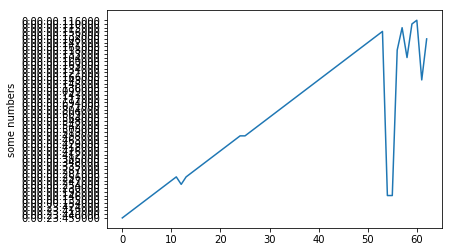

In [16]:
for i in range(15):
    cmd = add_candidate(str(i+8000), "Intestine", data[i%4])
    ! {cmd}
    sleep(5)
    
for i in range(15):
    cmd = add_organ(str(i+4000), "Intestine", data[i%4])
    ! {cmd}
    sleep(5)
    
for i in range(15):
    cmd = read_candidate(str(i+8000))
    ! {cmd}
    sleep(5)
    
for i in range(15):
    cmd = read_organ(str(i+4000))
    ! {cmd}
    sleep(5)
    
docker_container_list = []
docker_container_list = !{"docker ps --format='{{ .Names}}'"}
log_files = {}
for container in docker_container_list:
    cmd = ("docker inspect %s --format={{'.LogPath'}}"%container)
    val = !{cmd}
    log_files[container] = val[0]
    copy_cmd = ("echo ' ' | sudo -S cp %s logs_1_2_5s/%s.log" % (log_files[container], container))
    !{copy_cmd}
    chomd = ("echo ' ' | sudo -S chmod 777 logs_1_2_5s/%s.log" % ( container))
    !{chomd}
    pwd = !{"pwd"}
    log_files[container] = ('%s/logs_1_2_5s/%s.log'%(pwd[0],container))
docker_cleanup()
for container in peer_names:
    all_peers[container] = PeerContainer(str(container), log_files[container])
    set_blocks_info(all_peers[container])
head = "All containers with their log files are "
print(head)
for peer in peer_names:
    print("%s:%s"%(peer, type(all_peers[peer].log_file)))
    
# Adding block received times to the PeerContainer object
for peer in peer_names:
    l = ((all_peers[peer].find_received_block()))
    print('Recevied Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Received block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        all_peers[peer].block_times[int(block_number)] = [time]
        print('%s block was received at %s by peer %s' % (block_number, time, all_peers[peer].name))
        
for peer in peer_names:
    l = ((all_peers[peer].find_validated_block()))
    print('Validated Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Validated block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Validated at %s by peer %s' % (block_number, time, all_peers[peer].name))    
    
for peer in peer_names:
    l = ((all_peers[peer].find_commited_block()))
    print('Committed Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Committed block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Committed at %s by peer %s' % (block_number, time, all_peers[peer].name))
        
blocks = {}
# print(all_peers)
for j, peer in enumerate(all_peers):
    print(peer)
    print(all_peers[peer].block_times)
    print(len(all_peers[peer].block_times))
    for i in range(1, len(all_peers[peer].block_times)):
        rt = all_peers[peer].block_times[i][0]
        vt = all_peers[peer].block_times[i][1]
        ct = all_peers[peer].block_times[i][2]
        print("rt %s; vt %s; ct %s"% (rt, vt, ct))
        if i not in blocks:
            blocks[i] = Block(i)
        blocks[i].add_peer(all_peers[peer].name, rt, vt, ct)
    print(all_peers[peer].name)
    
propogation_times = []
for i in range(1, len(blocks)):
    print('Propogation Time of %s is %s' % (i, blocks[i].get_propogation_time(all_peers[peer])))
    propogation_times.append(blocks[i].get_propogation_time(all_peers[peer]))
    
import matplotlib.pyplot as plt
str_p_time=[]
for time in propogation_times:
    str_p_time.append(str(time))
plt.plot(str_p_time)
plt.ylabel('some numbers')
plt.show()

Experiment 2.2 Batch time out of 5 sec and one transaction every 10 sec

2019-04-21 21:04:54.825 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 21:05:05.540 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 21:05:16.119 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 21:05:26.730 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 21:05:37.310 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 21:05:47.904 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful

2019-04-21 21:10:25.575 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8001\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 21:10:36.067 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8002\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 21:10:46.615 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8003\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-04-21 21:10:57.137 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8004\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-04-21 21:11:07.674 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8005\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 21:11:18.186 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8006\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 21:11:28.703 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8007\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-04-21 21:11:39.217 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8008\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-04-21 21:11:49.749 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8009\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 21:12:00.318 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8010\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 21:12:10.918 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8011\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-04-21 21:12:21.605 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8012\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-04-21 21:12:32.141 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8013\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 21:12:42.670 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8014\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 21:12:53.226 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4000\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 21:13:03.769 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4001\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 21:13:14.285 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4002\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-21 21:13:24.828 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4003\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-04-21 21:13:35.367 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4004\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 21:13:45.887 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4005\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 21:13:56.451 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4006\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-21 21:14:06.960 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4007\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-04-21 21:14:17.489 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4008\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 21:14:28.003 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4009\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 21:14:38.541 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4010\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-21 21:14:49.056 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4011\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-04-21 21:14:59.591 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4012\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 21:15:10.162 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4013\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 21:15:20.708 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4014\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

ycaajzdu\\\", \\\"blood_inf_don\\\": \\\"d\\\", \\\"lis1_disposition\\\": 24144200, \\\"kil_initial_flush\\\": 25154232, \\\"kib_reason_ostxt\\\": \\\"yxhavovaqzwixernssenlsmqptdodjpbhhobaucibnyypadpeo\\\", \\\"home_city_don\\\": \\\"siapuorblbhmuokqshox\\\", \\\"med_exam_report\\\": \\\"v\\\", \\\"chagas_history\\\": \\\"t\\\", \\\"kil_final_flush_ostxt\\\": \\\"rpnrdtualmhlpivpmkvyziktyuzyivxkslosrafxorxeozunfu\\\", \\\"ins1_disposition\\\": 69673105, \\\"hbv_sur_antigen_don\\\": \\\"zf\\\", \\\"pas2_initial_flush_ostxt\\\": \\\"yevkquktrbqwlblygottsxbjllswloxsjljlvbsmqsddatxftq\\\", \\\"kir_final_flush_ostxt\\\": \\\"cupnaxvpxwtxdnmvmecmrzsyqhxvkrlnmozmzrvszrqauzullb\\\", \\\"lub_final_flush\\\": 53390383, \\\"num_pa_tx\\\": 3233354, \\\"diast_pa_cath_post_don\\\": 31372654, \\\"med_exam_perm\\\": \\\"q\\\", \\\"hr_initial_flush\\\": 14212443, \\\"amylase_don\\\": 87366834, \\\"num_ki_recov\\\": 88809047, \\\"kil_back_tbl_flush\\\": 90348909, \\\"lur_initial_flush_ostxt\\\": \\\"ixv

Untagged: dev-peer0.histocompatibility.organ.com-organcc-1.0-3c5b27ae0eecc788492cf5c07381f1b7c2819d1dcacff92c5f06e8c045cc6672:latest
Deleted: sha256:abd2501d2a29530183dab75db4f5e36538065e220927001c378210dc81058189
Deleted: sha256:a63cf39f04ab5d50e0da44d8390a20438f7129d0297b2f19a554e177fe09ee51
Deleted: sha256:b5e5cfe41faa2756ba0166e017f1ce2b2394f66648049b7305dab28e5fd926d0
Deleted: sha256:e4c73b1755b25181d2b1d3b76eb4604cc7f5a6578819bd9236439b6c8ce2075b
Untagged: dev-peer1.histocompatibility.organ.com-organcc-1.0-0b5c9cd45a927b038f35508e3863fe8bca8b5206c5ab19556ea651bce6dd7a24:latest
Deleted: sha256:a102bd6b4aab34492869f92a562bc196df336b67aacc4bca4294557fe3eeed18
Deleted: sha256:76de659bec21fd5df5867431f0c5dc2a68dee67800b9bba801a717a9478c91a6
Deleted: sha256:43c1919c6a28e8fadf1c53e8cc618e8eb0f5e638a23b9a809abf5c2aca4872f2
Deleted: sha256:636e73eacb095be52b1589439037ae4d00ccdf62aa2e48d043b851efdfa5001a
Untagged: dev-peer1.gp.organ.com-organcc-1.0-618ffec708d17fefd8ca5ca18551372fee8c0f40d

12 block was received at 2019-04-21 21:06:03.556000+00:00 by peer peer1.histocompatibility.organ.com
13 block was received at 2019-04-21 21:06:14.148000+00:00 by peer peer1.histocompatibility.organ.com
14 block was received at 2019-04-21 21:06:24.790000+00:00 by peer peer1.histocompatibility.organ.com
15 block was received at 2019-04-21 21:06:35.410000+00:00 by peer peer1.histocompatibility.organ.com
16 block was received at 2019-04-21 21:06:46.013000+00:00 by peer peer1.histocompatibility.organ.com
17 block was received at 2019-04-21 21:06:56.630000+00:00 by peer peer1.histocompatibility.organ.com
18 block was received at 2019-04-21 21:07:07.237000+00:00 by peer peer1.histocompatibility.organ.com
19 block was received at 2019-04-21 21:07:17.870000+00:00 by peer peer1.histocompatibility.organ.com
20 block was received at 2019-04-21 21:07:28.540000+00:00 by peer peer1.histocompatibility.organ.com
21 block was received at 2019-04-21 21:07:39.271000+00:00 by peer peer1.histocompatibility.

40 block was received at 2019-04-21 21:11:02.147000+00:00 by peer peer0.hospital.organ.com
41 block was received at 2019-04-21 21:11:12.681000+00:00 by peer peer0.hospital.organ.com
42 block was received at 2019-04-21 21:11:23.192000+00:00 by peer peer0.hospital.organ.com
43 block was received at 2019-04-21 21:11:33.713000+00:00 by peer peer0.hospital.organ.com
44 block was received at 2019-04-21 21:11:44.224000+00:00 by peer peer0.hospital.organ.com
45 block was received at 2019-04-21 21:11:54.755000+00:00 by peer peer0.hospital.organ.com
46 block was received at 2019-04-21 21:12:05.328000+00:00 by peer peer0.hospital.organ.com
47 block was received at 2019-04-21 21:12:15.926000+00:00 by peer peer0.hospital.organ.com
48 block was received at 2019-04-21 21:12:26.615000+00:00 by peer peer0.hospital.organ.com
49 block was received at 2019-04-21 21:12:37.150000+00:00 by peer peer0.hospital.organ.com
50 block was received at 2019-04-21 21:12:47.678000+00:00 by peer peer0.hospital.organ.com

59 block was Validated at 2019-04-21 21:14:22.506000+00:00 by peer peer1.gp.organ.com
60 block was Validated at 2019-04-21 21:14:33.023000+00:00 by peer peer1.gp.organ.com
61 block was Validated at 2019-04-21 21:14:43.561000+00:00 by peer peer1.gp.organ.com
62 block was Validated at 2019-04-21 21:14:54.075000+00:00 by peer peer1.gp.organ.com
63 block was Validated at 2019-04-21 21:15:04.608000+00:00 by peer peer1.gp.organ.com
64 block was Validated at 2019-04-21 21:15:15.176000+00:00 by peer peer1.gp.organ.com
65 block was Validated at 2019-04-21 21:15:25.732000+00:00 by peer peer1.gp.organ.com
Validated Line 65
1 block was Validated at 2019-04-21 21:01:50.864000+00:00 by peer peer0.histocompatibility.organ.com
2 block was Validated at 2019-04-21 21:01:50.956000+00:00 by peer peer0.histocompatibility.organ.com
3 block was Validated at 2019-04-21 21:01:51.021000+00:00 by peer peer0.histocompatibility.organ.com
4 block was Validated at 2019-04-21 21:01:51.106000+00:00 by peer peer0.histo

17 block was Validated at 2019-04-21 21:06:56.643000+00:00 by peer peer1.opo.organ.com
18 block was Validated at 2019-04-21 21:07:07.240000+00:00 by peer peer1.opo.organ.com
19 block was Validated at 2019-04-21 21:07:17.875000+00:00 by peer peer1.opo.organ.com
20 block was Validated at 2019-04-21 21:07:28.542000+00:00 by peer peer1.opo.organ.com
21 block was Validated at 2019-04-21 21:07:39.291000+00:00 by peer peer1.opo.organ.com
22 block was Validated at 2019-04-21 21:07:49.991000+00:00 by peer peer1.opo.organ.com
23 block was Validated at 2019-04-21 21:08:00.791000+00:00 by peer peer1.opo.organ.com
24 block was Validated at 2019-04-21 21:08:11.455000+00:00 by peer peer1.opo.organ.com
25 block was Validated at 2019-04-21 21:08:22.116000+00:00 by peer peer1.opo.organ.com
26 block was Validated at 2019-04-21 21:08:32.826000+00:00 by peer peer1.opo.organ.com
27 block was Validated at 2019-04-21 21:08:43.524000+00:00 by peer peer1.opo.organ.com
28 block was Validated at 2019-04-21 21:08:

34 block was Committed at 2019-04-21 21:09:59.121000+00:00 by peer peer0.gp.organ.com
35 block was Committed at 2019-04-21 21:10:10.032000+00:00 by peer peer0.gp.organ.com
36 block was Committed at 2019-04-21 21:10:20.207000+00:00 by peer peer0.gp.organ.com
37 block was Committed at 2019-04-21 21:10:30.673000+00:00 by peer peer0.gp.organ.com
38 block was Committed at 2019-04-21 21:10:41.173000+00:00 by peer peer0.gp.organ.com
39 block was Committed at 2019-04-21 21:10:51.738000+00:00 by peer peer0.gp.organ.com
40 block was Committed at 2019-04-21 21:11:02.255000+00:00 by peer peer0.gp.organ.com
41 block was Committed at 2019-04-21 21:11:12.788000+00:00 by peer peer0.gp.organ.com
42 block was Committed at 2019-04-21 21:11:23.277000+00:00 by peer peer0.gp.organ.com
43 block was Committed at 2019-04-21 21:11:33.856000+00:00 by peer peer0.gp.organ.com
44 block was Committed at 2019-04-21 21:11:44.367000+00:00 by peer peer0.gp.organ.com
45 block was Committed at 2019-04-21 21:11:54.854000+0

45 block was Committed at 2019-04-21 21:11:54.881000+00:00 by peer peer1.histocompatibility.organ.com
46 block was Committed at 2019-04-21 21:12:05.435000+00:00 by peer peer1.histocompatibility.organ.com
47 block was Committed at 2019-04-21 21:12:16.042000+00:00 by peer peer1.histocompatibility.organ.com
48 block was Committed at 2019-04-21 21:12:26.757000+00:00 by peer peer1.histocompatibility.organ.com
49 block was Committed at 2019-04-21 21:12:37.279000+00:00 by peer peer1.histocompatibility.organ.com
50 block was Committed at 2019-04-21 21:12:47.785000+00:00 by peer peer1.histocompatibility.organ.com
51 block was Committed at 2019-04-21 21:12:58.367000+00:00 by peer peer1.histocompatibility.organ.com
52 block was Committed at 2019-04-21 21:13:08.889000+00:00 by peer peer1.histocompatibility.organ.com
53 block was Committed at 2019-04-21 21:13:19.401000+00:00 by peer peer1.histocompatibility.organ.com
54 block was Committed at 2019-04-21 21:13:29.998000+00:00 by peer peer1.histocomp

65 block was Committed at 2019-04-21 21:15:25.871000+00:00 by peer peer0.hospital.organ.com
Committed Line 66
0 block was Committed at 2019-04-21 21:01:44.583000+00:00 by peer peer1.hospital.organ.com
1 block was Committed at 2019-04-21 21:01:50.498000+00:00 by peer peer1.hospital.organ.com
2 block was Committed at 2019-04-21 21:01:50.576000+00:00 by peer peer1.hospital.organ.com
3 block was Committed at 2019-04-21 21:01:50.647000+00:00 by peer peer1.hospital.organ.com
4 block was Committed at 2019-04-21 21:01:50.740000+00:00 by peer peer1.hospital.organ.com
5 block was Committed at 2019-04-21 21:02:12.960000+00:00 by peer peer1.hospital.organ.com
6 block was Committed at 2019-04-21 21:05:00.082000+00:00 by peer peer1.hospital.organ.com
7 block was Committed at 2019-04-21 21:05:10.671000+00:00 by peer peer1.hospital.organ.com
8 block was Committed at 2019-04-21 21:05:21.300000+00:00 by peer peer1.hospital.organ.com
9 block was Committed at 2019-04-21 21:05:31.933000+00:00 by peer peer1

Adding peer1.gp.organ.com with rt 2019-04-21 21:02:07.931000+00:00, vt 2019-04-21 21:02:07.952000+00:00 and ct 2019-04-21 21:02:07.986000+00:00
rt 2019-04-21 21:02:12.839000+00:00; vt 2019-04-21 21:02:12.843000+00:00; ct 2019-04-21 21:02:12.977000+00:00
Adding peer1.gp.organ.com with rt 2019-04-21 21:02:12.839000+00:00, vt 2019-04-21 21:02:12.843000+00:00 and ct 2019-04-21 21:02:12.977000+00:00
rt 2019-04-21 21:04:59.846000+00:00; vt 2019-04-21 21:04:59.848000+00:00; ct 2019-04-21 21:05:00.083000+00:00
Adding peer1.gp.organ.com with rt 2019-04-21 21:04:59.846000+00:00, vt 2019-04-21 21:04:59.848000+00:00 and ct 2019-04-21 21:05:00.083000+00:00
rt 2019-04-21 21:05:10.558000+00:00; vt 2019-04-21 21:05:10.564000+00:00; ct 2019-04-21 21:05:10.702000+00:00
Adding peer1.gp.organ.com with rt 2019-04-21 21:05:10.558000+00:00, vt 2019-04-21 21:05:10.564000+00:00 and ct 2019-04-21 21:05:10.702000+00:00
rt 2019-04-21 21:05:21.161000+00:00; vt 2019-04-21 21:05:21.164000+00:00; ct 2019-04-21 21:05:

rt 2019-04-21 21:10:41.082000+00:00; vt 2019-04-21 21:10:41.084000+00:00; ct 2019-04-21 21:10:41.182000+00:00
Adding peer1.gp.organ.com with rt 2019-04-21 21:10:41.082000+00:00, vt 2019-04-21 21:10:41.084000+00:00 and ct 2019-04-21 21:10:41.182000+00:00
rt 2019-04-21 21:10:51.634000+00:00; vt 2019-04-21 21:10:51.637000+00:00; ct 2019-04-21 21:10:51.738000+00:00
Adding peer1.gp.organ.com with rt 2019-04-21 21:10:51.634000+00:00, vt 2019-04-21 21:10:51.637000+00:00 and ct 2019-04-21 21:10:51.738000+00:00
rt 2019-04-21 21:11:02.155000+00:00; vt 2019-04-21 21:11:02.160000+00:00; ct 2019-04-21 21:11:02.257000+00:00
Adding peer1.gp.organ.com with rt 2019-04-21 21:11:02.155000+00:00, vt 2019-04-21 21:11:02.160000+00:00 and ct 2019-04-21 21:11:02.257000+00:00
rt 2019-04-21 21:11:12.693000+00:00; vt 2019-04-21 21:11:12.695000+00:00; ct 2019-04-21 21:11:12.806000+00:00
Adding peer1.gp.organ.com with rt 2019-04-21 21:11:12.693000+00:00, vt 2019-04-21 21:11:12.695000+00:00 and ct 2019-04-21 21:11:

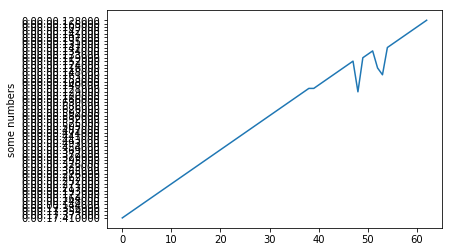

In [18]:
for i in range(15):
    cmd = add_candidate(str(i+8000), "Intestine", data[i%4])
    ! {cmd}
    sleep(10)
    
for i in range(15):
    cmd = add_organ(str(i+4000), "Intestine", data[i%4])
    ! {cmd}
    sleep(10)
    
for i in range(15):
    cmd = read_candidate(str(i+8000))
    ! {cmd}
    sleep(10)
    
for i in range(15):
    cmd = read_organ(str(i+4000))
    ! {cmd}
    sleep(10)
    
docker_container_list = []
docker_container_list = !{"docker ps --format='{{ .Names}}'"}
log_files = {}
for container in docker_container_list:
    cmd = ("docker inspect %s --format={{'.LogPath'}}"%container)
    val = !{cmd}
    log_files[container] = val[0]
    copy_cmd = ("echo ' ' | sudo -S cp %s logs_2_2_5s/%s.log" % (log_files[container], container))
    !{copy_cmd}
    chomd = ("echo ' ' | sudo -S chmod 777 logs_2_2_5s/%s.log" % ( container))
    !{chomd}
    pwd = !{"pwd"}
    log_files[container] = ('%s/logs_2_2_5s/%s.log'%(pwd[0],container))
docker_cleanup()
for container in peer_names:
    all_peers[container] = PeerContainer(str(container), log_files[container])
    set_blocks_info(all_peers[container])
head = "All containers with their log files are "
print(head)
for peer in peer_names:
    print("%s:%s"%(peer, type(all_peers[peer].log_file)))
    
# Adding block received times to the PeerContainer object
for peer in peer_names:
    l = ((all_peers[peer].find_received_block()))
    print('Recevied Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Received block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        all_peers[peer].block_times[int(block_number)] = [time]
        print('%s block was received at %s by peer %s' % (block_number, time, all_peers[peer].name))
        
for peer in peer_names:
    l = ((all_peers[peer].find_validated_block()))
    print('Validated Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Validated block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Validated at %s by peer %s' % (block_number, time, all_peers[peer].name))    
    
for peer in peer_names:
    l = ((all_peers[peer].find_commited_block()))
    print('Committed Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Committed block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Committed at %s by peer %s' % (block_number, time, all_peers[peer].name))
        
blocks = {}
# print(all_peers)
for j, peer in enumerate(all_peers):
    print(peer)
    print(all_peers[peer].block_times)
    print(len(all_peers[peer].block_times))
    for i in range(1, len(all_peers[peer].block_times)):
        rt = all_peers[peer].block_times[i][0]
        vt = all_peers[peer].block_times[i][1]
        ct = all_peers[peer].block_times[i][2]
        print("rt %s; vt %s; ct %s"% (rt, vt, ct))
        if i not in blocks:
            blocks[i] = Block(i)
        blocks[i].add_peer(all_peers[peer].name, rt, vt, ct)
    print(all_peers[peer].name)
    
propogation_times = []
for i in range(1, len(blocks)):
    print('Propogation Time of %s is %s' % (i, blocks[i].get_propogation_time(all_peers[peer])))
    propogation_times.append(blocks[i].get_propogation_time(all_peers[peer]))
    
import matplotlib.pyplot as plt
str_p_time=[]
for time in propogation_times:
    str_p_time.append(str(time))
plt.plot(str_p_time)
plt.ylabel('some numbers')
plt.show()